In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.datasets import get_rdataset

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, k_means, AgglomerativeClustering
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.datasets import make_classification
from sklearn.metrics.pairwise import euclidean_distances

from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
from scipy.spatial.distance import euclidean

#from sklearn.datasets import get_data_home

## Labs - 1
### PCA

In [10]:
df = get_rdataset("USArrests", cache=True).data

In [12]:
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [14]:
df.mean()

Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

In [18]:
df.std()

Murder       4.355510
Assault     83.337661
UrbanPop    14.474763
Rape         9.366385
dtype: float64

In [38]:
scaler = StandardScaler()
std_df = scaler.fit_transform(df)
std_df = pd.DataFrame(data = std_df,
                     index=df.index,
                     columns=df.columns)

In [39]:
std_df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,1.255179,0.790787,-0.526195,-0.003451
Alaska,0.513019,1.118060,-1.224067,2.509424
Arizona,0.072361,1.493817,1.009122,1.053466
Arkansas,0.234708,0.233212,-1.084492,-0.186794
California,0.281093,1.275635,1.776781,2.088814


In [40]:
std_df.mean()

Murder     -7.105427e-17
Assault     1.387779e-16
UrbanPop   -4.396483e-16
Rape        8.593126e-16
dtype: float64

In [41]:
std_df.std()

Murder      1.010153
Assault     1.010153
UrbanPop    1.010153
Rape        1.010153
dtype: float64

In [46]:
scaler.scale_

array([ 4.31173469, 82.50007515, 14.3292847 ,  9.27224762])

In [58]:
scaler.mean_

array([  7.788, 170.76 ,  65.54 ,  21.232])

In [59]:
scaler.var_

array([  18.591056, 6806.2624  ,  205.3284  ,   85.974576])

In [49]:
pca = PCA()
pca.fit(std_df)

PCA()

In [51]:
pd.DataFrame(data = pca.components_,
             index = pca.feature_names_in_)

,0,1,2,3
Murder,0.535899,0.583184,0.278191,0.543432
Assault,0.418181,0.187986,-0.872806,-0.167319
UrbanPop,-0.341233,-0.268148,-0.378016,0.817778
Rape,0.649228,-0.743407,0.133878,0.089024


In [55]:
components = pca.transform(std_df)

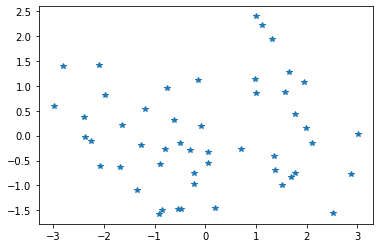

In [57]:
plt.plot(components.T[0], components.T[1], "*")

In [61]:
components.std(axis=0)

array([1.57487827, 0.99486941, 0.59712912, 0.41644938])

In [63]:
pca.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

In [66]:
components.std(axis=0)**2/(components.std(axis=0)**2).sum()

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

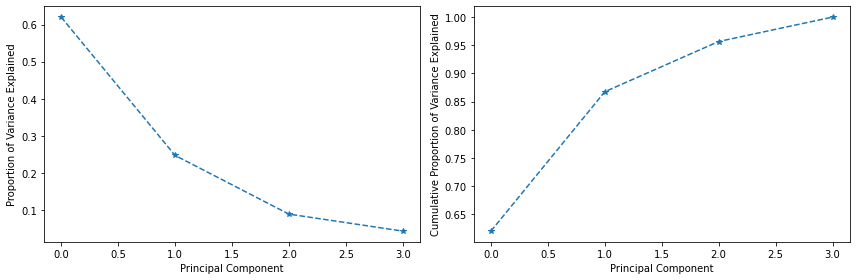

In [70]:
f, ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(pca.explained_variance_ratio_, "--*")
ax[0].set_xlabel("Principal Component")
ax[0].set_ylabel("Proportion of Variance Explained")

ax[1].plot(np.cumsum(pca.explained_variance_ratio_), "--*")
ax[1].set_xlabel("Principal Component")
ax[1].set_ylabel("Cumulative Proportion of Variance Explained")

f.tight_layout()

## Labs - 2
### Clustering

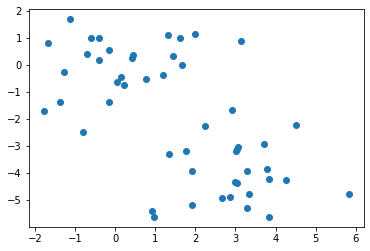

In [74]:
x = np.random.randn(50,2)
x[:25,0]+=3
x[:25,1]-=4

plt.scatter(x.T[0], x.T[1])

In [76]:
centroids, y_pred, _ = k_means(x, 2)

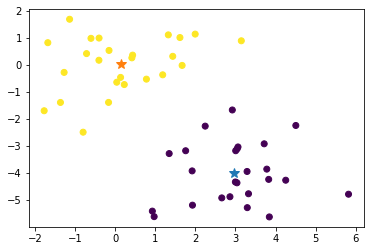

In [86]:
plt.scatter(x.T[0], x.T[1], c=y_pred)
plt.plot(centroids[0,0], centroids[0,1], marker="*", markersize=10)
plt.plot(centroids[1,0], centroids[1,1], marker="*", markersize=10)

In [98]:
centroids, y_pred, _ = k_means(x, 2, n_init=20)

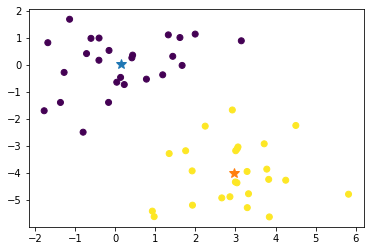

In [99]:
plt.scatter(x.T[0], x.T[1], c=y_pred)
for centroid in centroids:
    plt.plot(centroid[0], centroid[1], marker="*", markersize=10)

In [102]:
centroids, y_pred, _ = k_means(x, 3, n_init=20)

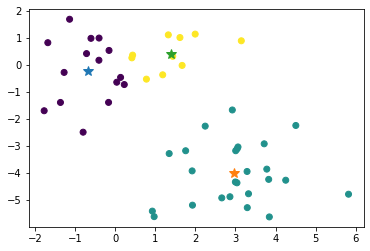

In [103]:
plt.scatter(x.T[0], x.T[1], c=y_pred)
for centroid in centroids:
    plt.plot(centroid[0], centroid[1], marker="*", markersize=10)

In [104]:
centroids

array([[-0.66748632, -0.22769588],
       [ 2.97359573, -4.01180802],
       [ 1.40178941,  0.42185945]])

In [105]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 2,
       0, 0, 2, 0, 0, 2])

In [106]:
kmeans = KMeans(n_clusters=3, n_init=20).fit(x)

In [110]:
kmeans.cluster_centers_

-94.53163087051705

In [123]:
def euc(a,b):
    return sum( (x-y)**2 for x,y in zip(a,b) ) 

cluster_dist = [[],[],[]]
for point, cluster in zip(x, kmeans.labels_):
    cluster_dist[cluster].append( euc(point, kmeans.cluster_centers_[cluster]) )
for i, cluster in enumerate(cluster_dist):
    cluster_dist[i] = sum(cluster)

In [127]:
cluster_dist

[12.191739365712303, 54.38681641980535, 27.953075084999405]

In [124]:
sum(cluster_dist)

94.53163087051706

In [128]:
k_means(x, n_clusters=3, n_init=1)[2]

103.72255571332414

In [129]:
k_means(x, n_clusters=3, n_init=20)[2]

94.53163087051706

### Hierarchical Clustering

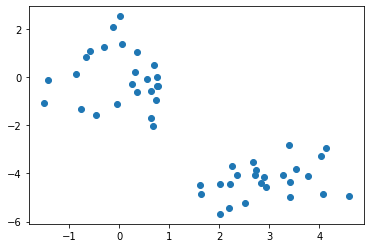

In [131]:
x = np.random.randn(50,2)
x[:25,0]+=3
x[:25,1]-=4

plt.scatter(x.T[0], x.T[1])

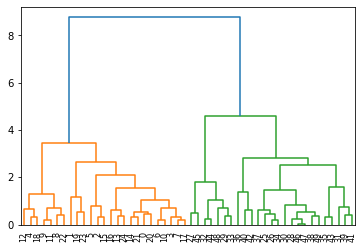

In [144]:
hcomp=linkage(x, "complete")
dendrogram(hcomp)
plt.show()

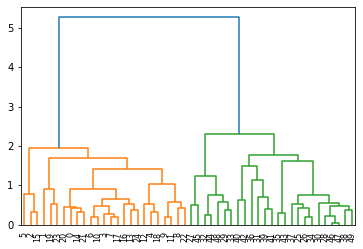

In [145]:
havg=linkage(x, "average")
dendrogram(havg)
plt.show()

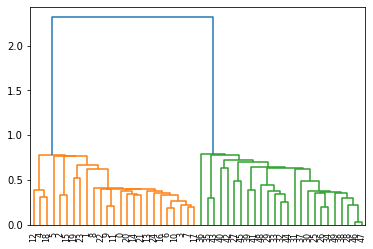

In [146]:
htree=linkage(x, "single")
dendrogram(htree)
plt.show()

In [148]:
cut_tree(hcomp, 2).flatten()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [149]:
cut_tree(havg, 2).flatten()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [150]:
cut_tree(htree, 2).flatten()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [151]:
cut_tree(htree, 4).flatten()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1])

In [153]:
x = StandardScaler().fit_transform(x)

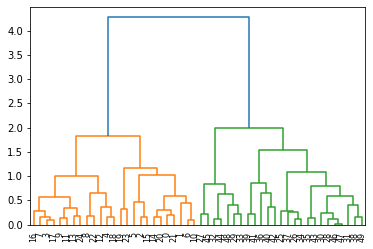

In [156]:
hcomp=linkage(x, "complete")
dendrogram(hcomp)
plt.show()

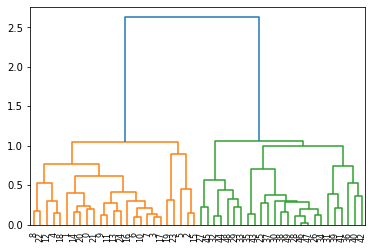

In [157]:
havg=linkage(x, "average")
dendrogram(havg)
plt.show()

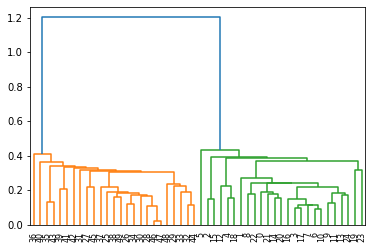

In [158]:
htree=linkage(x, "single")
dendrogram(htree)
plt.show()

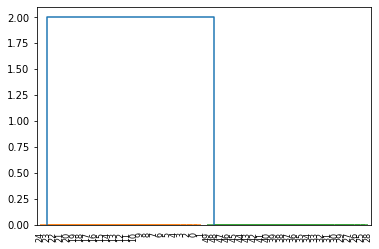

In [160]:
corr = linkage(x, metric="correlation")
dendrogram(corr)
plt.show()

## Labs - 3

### NCI60

In [188]:
df = get_rdataset("NCI60", "ISLR", True).data

In [189]:
labs = df.labs
data = df.drop(columns="labs")

In [190]:
data.shape

(64, 6830)

In [191]:
labs

V1          CNS
V2          CNS
V3          CNS
V4        RENAL
V5       BREAST
         ...   
V60    MELANOMA
V61    MELANOMA
V62    MELANOMA
V63    MELANOMA
V64    MELANOMA
Name: labs, Length: 64, dtype: object

In [192]:
labs.value_counts()

RENAL          9
NSCLC          9
MELANOMA       8
BREAST         7
COLON          7
OVARIAN        6
LEUKEMIA       6
CNS            5
PROSTATE       2
UNKNOWN        1
K562B-repro    1
K562A-repro    1
MCF7A-repro    1
MCF7D-repro    1
Name: labs, dtype: int64

In [193]:
std_data = StandardScaler().fit(data)

In [194]:
std_data = pd.DataFrame(data = std_data.transform(data),
                       index = data.index,
                       columns=data.columns)

In [197]:
pca = PCA().fit(std_data)

In [208]:
components = pca.transform(std_data)

In [211]:
y = pd.factorize(labs)[0]

Text(0, 0.5, 'Z3')

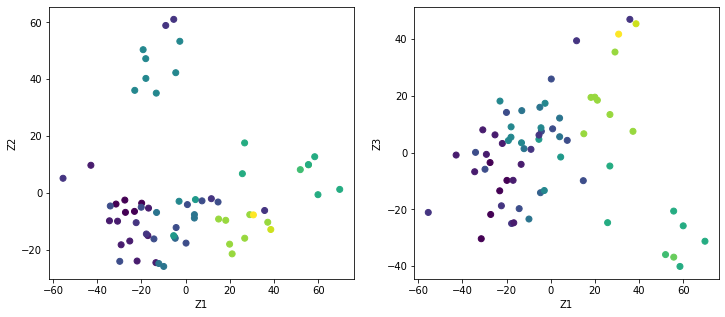

In [218]:
f, ax = plt.subplots(1, 2, figsize=(12,5))

ax[0].scatter(components[:, 0], components[:, 1], c = y)
ax[0].set_xlabel("Z1")
ax[0].set_ylabel("Z2")

ax[1].scatter(components[:, 0], components[:, 2], c = y)
ax[1].set_xlabel("Z1")
ax[1].set_ylabel("Z3")

In [222]:
components.std(axis=0)[:5]

array([27.85346888, 21.48135547, 19.82046479, 17.03255621, 15.97180678])

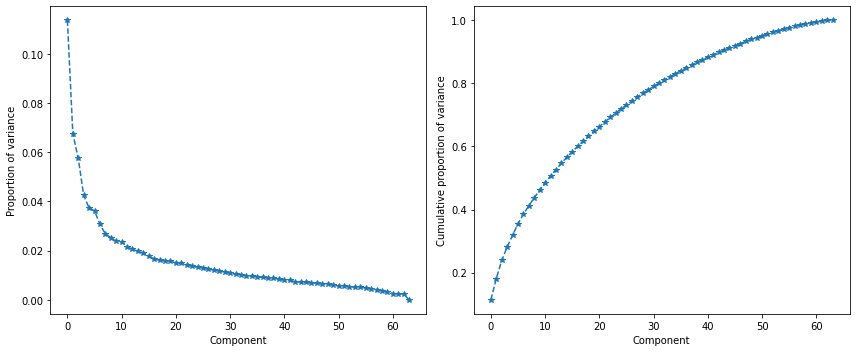

In [231]:
f, ax = plt.subplots(1, 2, figsize=(12,5))

ax[0].plot(pca.explained_variance_ratio_, "--*")
ax[0].set_xlabel("Component")
ax[0].set_ylabel("Proportion of variance")

ax[1].plot( np.cumsum(pca.explained_variance_ratio_ ), "--*")
ax[1].set_xlabel("Component")
ax[1].set_ylabel("Cumulative proportion of variance")
f.tight_layout()

In [234]:
sum(np.cumsum(pca.explained_variance_ratio_)<0.75)

27

In [236]:
std_data.head()

,data.1,data.2,data.3,data.4,data.5,data.6,data.7,data.8,data.9,data.10,data.11,data.12,data.13,data.14,data.15,data.16,data.17,data.18,data.19,data.20,data.21,data.22,data.23,data.24,data.25,data.26,data.27,data.28,data.29,data.30,data.31,data.32,data.33,data.34,data.35,data.36,data.37,data.38,data.39,data.40,data.41,data.42,data.43,data.44,data.45,data.46,data.47,data.48,data.49,data.50,data.51,data.52,data.53,data.54,data.55,data.56,data.57,data.58,data.59,data.60,data.61,data.62,data.63,data.64,data.65,data.66,data.67,data.68,data.69,data.70,data.71,data.72,data.73,data.74,data.75,data.76,data.77,data.78,data.79,data.80,data.81,data.82,data.83,data.84,data.85,data.86,data.87,data.88,data.89,data.90,data.91,data.92,data.93,data.94,data.95,data.96,data.97,data.98,data.99,data.100,data.101,data.102,data.103,data.104,data.105,...,data.6726,data.6727,data.6728,data.6729,data.6730,data.6731,data.6732,data.6733,data.6734,data.6735,data.6736,data.6737,data.6738,data.6739,data.6740,data.6741,data.6742,data.6743,data.6744,data.6745,data.6746,data.6747,data.6748,data.6749,data.6750,data.6751,data.6752,data.6753,data.6754,data.6755,data.6756,data.6757,data.6758,data.6759,data.6760,data.6761,data.6762,data.6763,data.6764,data.6765,data.6766,data.6767,data.6768,data.6769,data.6770,data.6771,data.6772,data.6773,data.6774,data.6775,data.6776,data.6777,data.6778,data.6779,data.6780,data.6781,data.6782,data.6783,data.6784,data.6785,data.6786,data.6787,data.6788,data.6789,data.6790,data.6791,data.6792,data.6793,data.6794,data.6795,data.6796,data.6797,data.6798,data.6799,data.6800,data.6801,data.6802,data.6803,data.6804,data.6805,data.6806,data.6807,data.6808,data.6809,data.6810,data.6811,data.6812,data.6813,data.6814,data.6815,data.6816,data.6817,data.6818,data.6819,data.6820,data.6821,data.6822,data.6823,data.6824,data.6825,data.6826,data.6827,data.6828,data.6829,data.6830
V1,0.728671,1.607220,1.325688,1.355688,-0.604845,-0.220654,0.898137,-0.868741,-1.058612,-1.059174,-1.131964,-1.415571,0.820233,0.048805,-0.320710,-1.218518,-0.785648,-1.023926,-0.043347,-1.154356,-0.894659,-1.023372,-0.633867,0.254350,-0.145046,0.008030,-1.154356,-0.607235,-1.093944,-1.668168,0.115280,-1.406479,-0.949803,0.006209,-0.548805,-0.312554,0.603921,1.250810,0.197769,-0.005578,0.397713,-0.494776,-0.176347,-0.453668,-0.742184,-2.883374,-0.007358,0.228193,0.362270,0.273051,-0.777139,-0.777130,-1.262633,-0.789714,-0.753170,-0.410038,-0.798532,1.512198,0.604932,-0.387186,-0.621650,1.063058,0.041993,1.719312,1.203900,0.419007,0.465703,0.313666,-0.597346,0.348378,-1.420169,0.288840,0.277741,-0.155126,-0.712379,-0.363590,0.711746,1.242222,1.896667,0.220709,-0.853307,1.183046,-0.071667,-0.426140,0.638751,-0.077826,0.137157,0.366124,0.661623,0.275038,1.120008,1.165106,-0.601883,1.020360,0.811100,1.186532,-0.547944,-1.689808,-0.016586,0.078654,1.318805,0.079567,-0.148609,-0.279811,-0.249510,...,2.792820,0.113344,-0.263986,0.252405,-0.947384,0.009509,-0.457313,-1.372553,-2.648255,-0.637703,-0.586976,-0.715226,0.415179,0.319022,0.240944,-0.387635,-1.263904,-0.742442,0.660675,-0.152510,-0.434045,2.040308,0.603983,1.354091,0.405542,1.064605,-0.329684,-0.077809,0.530766,-0.014605,0.586624,0.764021,0.922681,0.847113,0.055860,1.058017,1.068058,-0.663408,-0.161822,-0.102248,-0.787451,0.276014,0.015832,0.472005,0.186816,0.531772,0.376902,1.097587,1.404263,0.544575,1.589557,1.667278,1.760977,1.546466,2.603927,0.466776,1.941342,1.898867,2.456414,2.449054,1.576004,3.287443,3.472810,1.127245,0.361055,0.584818,1.141914,0.319927,0.034355,-0.231433,-0.506252,0.186955,0.844695,-0.052459,-0.072773,-0.131760,0.526308,0.246085,0.553272,-0.315848,0.128300,0.334997,0.073429,0.653259,1.036575,0.217023,0.775551,0.513161,1.100785,1.033403,-1.242515,0.647740,0.348278,0.006261,-1.016781,-1.030663,-0.358518,-0.238245,-0.392487,0.831370,-0.200286,-0.075668,0.520893,-0.836365,-1.384675
V2,1.596418,1.753544,0.441686,0.654119,0.911898,1.648748,1.849697,2.226625,-0.095860,-0.477977,-0.616503,-1.116670,0.1

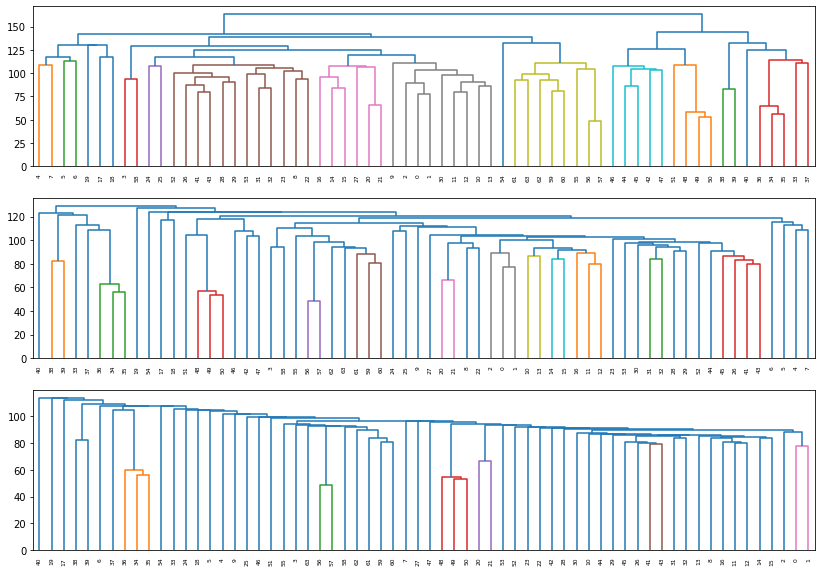

In [244]:
hcomp = linkage(std_data, method="complete")
havg = linkage(std_data, method="average")
hsing = linkage(std_data)

f, ax = plt.subplots(3, 1, figsize=(14,10))
dendrogram(hcomp, ax = ax[0])
dendrogram(havg, ax = ax[1])
dendrogram(hsing, ax = ax[2])
plt.show()

In [246]:
cut_tree(hcomp, 4).flatten()

array([0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 3, 0,
       3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [247]:
y

array([ 0,  0,  0,  1,  2,  0,  0,  2,  3,  3,  1,  1,  1,  1,  1,  1,  1,
        2,  3,  1,  4,  5,  6,  7,  5,  5,  5,  5,  5,  7,  3,  3,  3,  8,
        9, 10,  8,  8,  8,  8,  8, 11, 11, 11, 11, 11, 11, 11, 12,  2, 13,
        2,  3,  3,  3,  6,  2,  2,  6,  6,  6,  6,  6,  6], dtype=int64)

Text(0, 0.5, 'Z3')

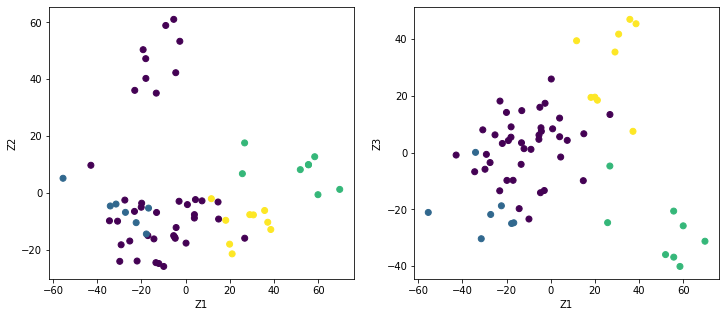

In [248]:
f, ax = plt.subplots(1, 2, figsize=(12,5))

ax[0].scatter(components[:, 0], components[:, 1], c = cut_tree(hcomp, 4).flatten())
ax[0].set_xlabel("Z1")
ax[0].set_ylabel("Z2")

ax[1].scatter(components[:, 0], components[:, 2], c = cut_tree(hcomp, 4).flatten())
ax[1].set_xlabel("Z1")
ax[1].set_ylabel("Z3")

In [262]:
for i in labs.unique():
    print(pd.Series(index = labs, data = cut_tree(hcomp, 4).flatten()).loc[i])

labs
CNS    0
CNS    0
CNS    0
CNS    1
CNS    1
dtype: int32
labs
RENAL    0
RENAL    0
RENAL    0
RENAL    0
RENAL    0
RENAL    0
RENAL    0
RENAL    0
RENAL    1
dtype: int32
labs
BREAST    1
BREAST    1
BREAST    1
BREAST    3
BREAST    3
BREAST    0
BREAST    0
dtype: int32
labs
NSCLC    0
NSCLC    0
NSCLC    1
NSCLC    0
NSCLC    0
NSCLC    0
NSCLC    0
NSCLC    0
NSCLC    0
dtype: int32
0
labs
OVARIAN    0
OVARIAN    0
OVARIAN    0
OVARIAN    0
OVARIAN    0
OVARIAN    0
dtype: int32
labs
MELANOMA    0
MELANOMA    0
MELANOMA    0
MELANOMA    0
MELANOMA    0
MELANOMA    0
MELANOMA    0
MELANOMA    0
dtype: int32
labs
PROSTATE    0
PROSTATE    0
dtype: int32
labs
LEUKEMIA    2
LEUKEMIA    2
LEUKEMIA    2
LEUKEMIA    2
LEUKEMIA    2
LEUKEMIA    2
dtype: int32
2
2
labs
COLON    0
COLON    3
COLON    0
COLON    3
COLON    3
COLON    3
COLON    3
dtype: int32
3
3


In [265]:
centroids, classes, _ = k_means(std_data, 4, n_init=20)

Text(0, 0.5, 'Z3')

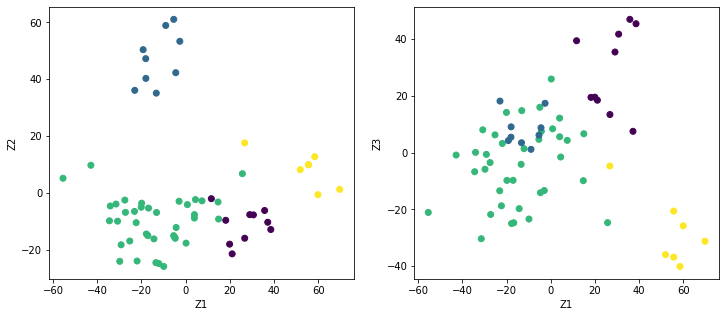

In [266]:
f, ax = plt.subplots(1, 2, figsize=(12,5))

ax[0].scatter(components[:, 0], components[:, 1], c = classes)
ax[0].set_xlabel("Z1")
ax[0].set_ylabel("Z2")

ax[1].scatter(components[:, 0], components[:, 2], c = classes)
ax[1].set_xlabel("Z1")
ax[1].set_ylabel("Z3")

In [267]:
for i in labs.unique():
    print(pd.Series(index = labs, data = classes).loc[i])

labs
CNS    2
CNS    2
CNS    2
CNS    2
CNS    2
dtype: int32
labs
RENAL    2
RENAL    2
RENAL    2
RENAL    2
RENAL    2
RENAL    2
RENAL    2
RENAL    2
RENAL    2
dtype: int32
labs
BREAST    2
BREAST    2
BREAST    2
BREAST    0
BREAST    0
BREAST    1
BREAST    1
dtype: int32
labs
NSCLC    2
NSCLC    2
NSCLC    2
NSCLC    2
NSCLC    2
NSCLC    2
NSCLC    2
NSCLC    2
NSCLC    2
dtype: int32
2
labs
OVARIAN    2
OVARIAN    2
OVARIAN    2
OVARIAN    2
OVARIAN    2
OVARIAN    2
dtype: int32
labs
MELANOMA    2
MELANOMA    1
MELANOMA    1
MELANOMA    1
MELANOMA    1
MELANOMA    1
MELANOMA    1
MELANOMA    1
dtype: int32
labs
PROSTATE    2
PROSTATE    2
dtype: int32
labs
LEUKEMIA    3
LEUKEMIA    3
LEUKEMIA    3
LEUKEMIA    3
LEUKEMIA    3
LEUKEMIA    2
dtype: int32
3
3
labs
COLON    2
COLON    0
COLON    0
COLON    0
COLON    0
COLON    0
COLON    0
dtype: int32
0
0


In [270]:
cut_tree(hcomp, 4).flatten()

array([0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 3, 0,
       3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [272]:
classes

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1])

## Applied

> 7

In [278]:
df = get_rdataset("USArrests", cache=True).data

In [279]:
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [280]:
df.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


In [283]:
df.corr(method = euclidean)

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,1280.902885,421.344040,109.600091
Assault,1280.902885,1.000000,934.633083,1188.130725
UrbanPop,421.344040,934.633083,1.000000,327.505450
Rape,109.600091,1188.130725,327.505450,1.000000


In [287]:
pd.DataFrame( data = StandardScaler().fit_transform(df),
                index = df.index,
                columns= df.columns ).corr( method = euclidean )

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,4.451142,9.645866,6.606218
Assault,4.451142,1.000000,8.608881,5.785834
UrbanPop,9.645866,8.608881,1.000000,7.672410
Rape,6.606218,5.785834,7.672410,1.000000


In [294]:
((1 - df.corr())/pd.DataFrame( data = StandardScaler().fit_transform(df),
                index = df.index,
                columns= df.columns ).corr( method = euclidean )).describe()

,Murder,Assault,UrbanPop,Rape
count,4.000000,4.000000,4.000000,4.000000
mean,0.051758,0.047115,0.064818,0.050161
std,0.040555,0.035875,0.043957,0.034321
min,0.000000,0.000000,0.000000,0.000000
25%,0.033384,0.033384,0.057543,0.043394
50%,0.055287,0.051185,0.081406,0.061960
75%,0.073661,0.064916,0.088681,0.068728
max,0.096459,0.086089,0.096459,0.076724


In [293]:
((1 - df.corr())/df.corr( method = euclidean )).describe()

,Murder,Assault,UrbanPop,Rape
count,4.000000,4.000000,4.000000,4.000000
mean,0.001586,0.000307,0.001200,0.001515
std,0.001888,0.000344,0.000997,0.001824
min,0.000000,0.000000,0.000000,0.000000
25%,0.000116,0.000116,0.000595,0.000211
50%,0.001181,0.000218,0.001295,0.001040
75%,0.002652,0.000410,0.001900,0.002344
max,0.003982,0.000793,0.002208,0.003982


> 8

In [302]:
scaler = StandardScaler().fit(df)
std_df = pd.DataFrame( data = pca.transform(df),
                         index = df.index,
                         columns = df.columns )

In [303]:
pca = PCA().fit(std_df)

In [307]:
pca.transform(std_df).var(axis=0)/pca.transform(std_df).var(axis=0).sum()

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

> 9

In [333]:
hcomp = linkage(df, method="complete")

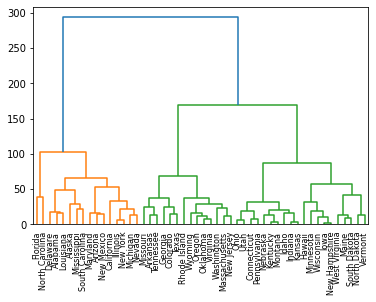

In [334]:
dendrogram(hcomp , labels=df.index)
plt.show()

In [335]:
cut_tree(hcomp, 3).flatten()

array([0, 0, 0, 1, 0, 1, 2, 0, 0, 1, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 1, 0,
       2, 0, 1, 2, 2, 0, 2, 1, 0, 0, 0, 2, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2,
       2, 1, 1, 2, 2, 1])

In [336]:
clusters = pd.Series(index = df.index, data = cut_tree(hcomp, 3).flatten() )

In [337]:
clusters[clusters==0]

Alabama           0
Alaska            0
Arizona           0
California        0
Delaware          0
Florida           0
Illinois          0
Louisiana         0
Maryland          0
Michigan          0
Mississippi       0
Nevada            0
New Mexico        0
New York          0
North Carolina    0
South Carolina    0
dtype: int32

In [338]:
clusters[clusters==1]

Arkansas         1
Colorado         1
Georgia          1
Massachusetts    1
Missouri         1
New Jersey       1
Oklahoma         1
Oregon           1
Rhode Island     1
Tennessee        1
Texas            1
Virginia         1
Washington       1
Wyoming          1
dtype: int32

In [339]:
clusters[clusters==2]

Connecticut      2
Hawaii           2
Idaho            2
Indiana          2
Iowa             2
Kansas           2
Kentucky         2
Maine            2
Minnesota        2
Montana          2
Nebraska         2
New Hampshire    2
North Dakota     2
Ohio             2
Pennsylvania     2
South Dakota     2
Utah             2
Vermont          2
West Virginia    2
Wisconsin        2
dtype: int32

In [340]:
clusters.value_counts()

2    20
0    16
1    14
dtype: int64

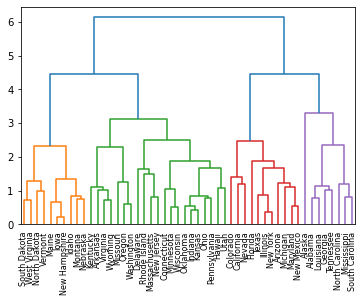

In [341]:
hcomp = linkage(std_df, method="complete")
dendrogram(hcomp , labels=df.index)
plt.show()

In [342]:
cut_tree(hcomp, 3).flatten()

array([0, 0, 1, 2, 1, 1, 2, 2, 1, 0, 2, 2, 1, 2, 2, 2, 2, 0, 2, 1, 2, 1,
       2, 0, 2, 2, 2, 1, 2, 2, 1, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 1, 2,
       2, 2, 2, 2, 2, 2])

In [343]:
clusters = pd.Series(index = df.index, data = cut_tree(hcomp, 3).flatten() )

In [344]:
clusters[clusters==0]

Alabama           0
Alaska            0
Georgia           0
Louisiana         0
Mississippi       0
North Carolina    0
South Carolina    0
Tennessee         0
dtype: int32

In [345]:
clusters[clusters==1]

Arizona       1
California    1
Colorado      1
Florida       1
Illinois      1
Maryland      1
Michigan      1
Nevada        1
New Mexico    1
New York      1
Texas         1
dtype: int32

In [346]:
clusters[clusters==2]

Arkansas         2
Connecticut      2
Delaware         2
Hawaii           2
Idaho            2
Indiana          2
Iowa             2
Kansas           2
Kentucky         2
Maine            2
Massachusetts    2
Minnesota        2
Missouri         2
Montana          2
Nebraska         2
New Hampshire    2
New Jersey       2
North Dakota     2
Ohio             2
Oklahoma         2
Oregon           2
Pennsylvania     2
Rhode Island     2
South Dakota     2
Utah             2
Vermont          2
Virginia         2
Washington       2
West Virginia    2
Wisconsin        2
Wyoming          2
dtype: int32

In [347]:
clusters.value_counts()

2    31
1    11
0     8
dtype: int64

> 10

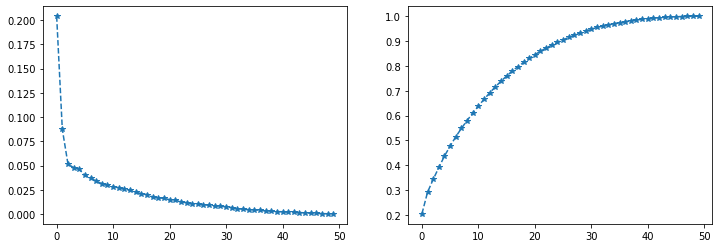

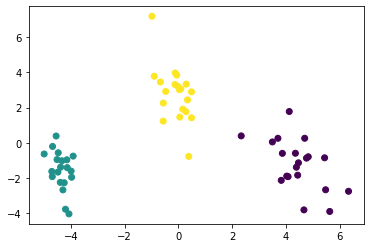

In [360]:
x, y = make_classification(n_samples=60,
                   n_classes=3,
                   n_clusters_per_class=1, 
                    n_features=50, 
                    n_redundant=0,
                    class_sep=3)
pca = PCA().fit(x)

f,ax = plt.subplots(1,2,figsize=(12,4))
ax[0].plot(pca.explained_variance_ratio_, "--*")
ax[1].plot(np.cumsum(pca.explained_variance_ratio_), "--*")

components = pca.transform(x)
plt.figure()
plt.scatter(components[:,0], components[:,1], c=y)

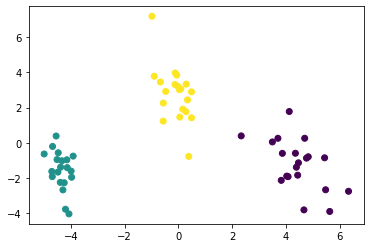

In [365]:
centroids, classification , _ = k_means(x, 3)
plt.scatter(components[:,0], components[:,1], c=classification)

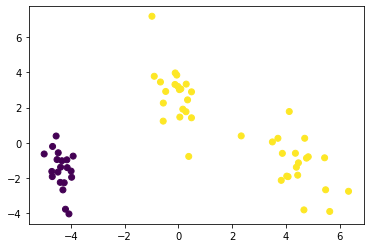

In [367]:
centroids, classification , _ = k_means(x, 2)
plt.scatter(components[:,0], components[:,1], c=classification)

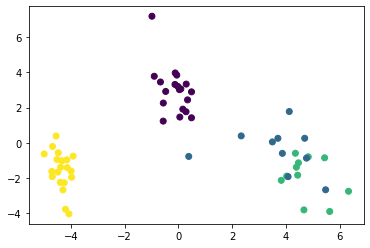

In [368]:
centroids, classification , _ = k_means(x, 4)
plt.scatter(components[:,0], components[:,1], c=classification)

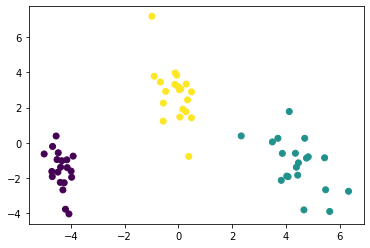

In [369]:
centroids, classification , _ = k_means( pca.transform(x)[:, :2] , 3)
plt.scatter(components[:,0], components[:,1], c=classification)

In [370]:
scaler = StandardScaler().fit(x)
std_x = scaler.transform(x)

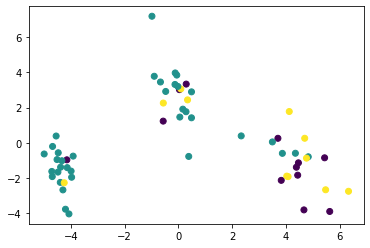

In [371]:
centroids, classification , _ = k_means( std_x , 3)
plt.scatter(components[:,0], components[:,1], c=classification)

> 11

In [2]:
df = pd.read_csv("ALL CSV FILES/Ch10Ex11.csv", header=None)

In [384]:
data = euclidean_distances( (1 - df.corr()) )

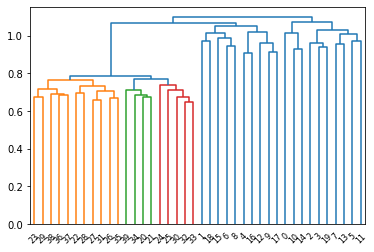

In [4]:
tree = linkage(df.T, method="complete", metric="correlation")
dendrogram(tree)
plt.show()

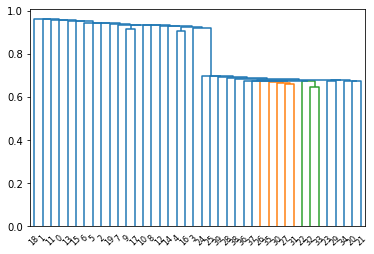

In [5]:
tree = linkage(df.T, method="single", metric="correlation")
dendrogram(tree)
plt.show()

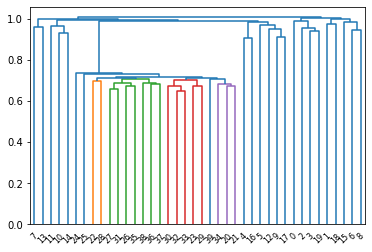

In [6]:
tree = linkage(df.T, method="average", metric="correlation")
dendrogram(tree)
plt.show()

In [24]:
df.index = df.index.map(str)

In [25]:
pca = PCA().fit(df.T)

In [26]:
pca.explained_variance_ratio_

array([1.26676539e-01, 3.27143790e-02, 3.12916966e-02, 3.02086215e-02,
       2.93949769e-02, 2.88682047e-02, 2.82052030e-02, 2.76352610e-02,
       2.73601816e-02, 2.69360470e-02, 2.67628417e-02, 2.64878670e-02,
       2.59285836e-02, 2.52810046e-02, 2.47450163e-02, 2.41705580e-02,
       2.40230612e-02, 2.35761218e-02, 2.32532180e-02, 2.27101544e-02,
       2.25528000e-02, 2.23769634e-02, 2.18537022e-02, 2.14526355e-02,
       2.10185663e-02, 2.06228152e-02, 2.05385751e-02, 1.99174549e-02,
       1.96335770e-02, 1.92566213e-02, 1.89318256e-02, 1.85330460e-02,
       1.82338949e-02, 1.79529076e-02, 1.69275359e-02, 1.68776274e-02,
       1.61758317e-02, 1.56925327e-02, 1.52215506e-02, 2.47013037e-32])

In [39]:
pd.DataFrame( pca.components_,
             columns=df.index,
             )

0      0.000278
1      0.094190
2     -0.152352
3      0.298541
4     -0.273871
         ...   
995   -0.178136
996   -0.114036
997    0.389850
998    0.052293
999    0.243083
Length: 1000, dtype: float64